<img src="http://nci.org.au/wp-content/themes/nci/img/img-logo-large.png", width=400>

-------
# Data Access and Manipulation Using iPython Notebooks
## OFAM and Himawari 8



### In this notebook:

**The following will go through how to:** <br \>
   1. Access netCDF data locally from /g/data 
   2. Extract/view data
   3. Combine data from different datasets


   
#### The following material uses the CSIRO Ocean Forcasting Australian Model (OFAM) and the Bureau of Meteorology Himawari 8 Data Collections. For more information on the collection and licensing, please [click here for OFAM](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f9007_2850_9392_7175) and [here for Himawari 8](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f9007_2850_9392_7175). 


---------


### <a id='part1'></a>Prerequisites

#### A Python 3 environment

Setup instructions for python 3 virtual environments can be found [here](https://nbviewer.jupyter.org/github/adamsteer/nci-notebooks/blob/master/training/py3/VDI_Python3.ipynb).

Ensure that the VDI modules listed below are loaded **in the order listed**. If you're uncertain, purge modules and start over (you can do this from inside your Python virtual environment).

```
    $ module load proj/4.8.0
    $ module load geos/3.5.0
    $ module load python3/3.5.2
    $ module load python3/3.5.2-matplotlib
    $ module load ipython/4.2.0-py3.5

```

The following Python modules need to be installed in your virtual environment:
1. Numpy
2. Cython
3. Cartopy 0.13

Check loaded modules using `pip list`
```
   $ source /path/to/your_virtualenv/bin/activate
   (your_venv)$ pip list
```

If you don't see any of the modules listed, then:

```
    (your_venv)$ pip3 install numpy
    (your_venv)$ pip3 install cython
    (your_venv)$ pip3 install cartopy==0.13
```
Cartopy needs a version flag (==0.13) because later iterations require Proj4.9, which is not available on the VDI at the time of writing this material.

```
   (your_venv)$ pip list
```
...should now show the required modules.

<br>
Launch the Jupyter Notebook application:
```
    $ jupyter notebook
``` 

<div class="alert alert-info">
<b>NOTE: </b> This will launch the <b>Notebook Dashboard</b> within a new web browser window. 
</div>


## Import python libraries

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

## Ocean Forcasting Australian Model (OFAM v3.0) Data

**Geonetwork URL:** http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f9007_2850_9392_7175

**NCI THREDDS Data Server:** 
http://dapds00.nci.org.au/thredds/catalogs/gb6/catalog.html

### Open dataset 

In [2]:
ofam_path = '/g/data3/gb6/BRAN/BRAN_2015/OFAM/ocean_temp_2016_02.nc'

In [3]:
ofam = Dataset(ofam_path)

### Take a look at the file contents 

In [4]:
for item in ofam.dimensions:
    print("name: {}, size: {}\n".format(ofam.dimensions[item].name, ofam.dimensions[item].size))


print("\n")
vars = ofam.variables.keys()
for item in vars:
    print('Variable:\t{}'.format(item))
    print('Dimensions:\t{}'.format(ofam[item].dimensions))
    print('Shape:\t{}\n'.format(ofam[item].shape))

name: xt_ocean, size: 3600

name: yt_ocean, size: 1500

name: st_ocean, size: 51

name: Time, size: 29

name: nv, size: 2

name: st_edges_ocean, size: 52



Variable:	xt_ocean
Dimensions:	('xt_ocean',)
Shape:	(3600,)

Variable:	yt_ocean
Dimensions:	('yt_ocean',)
Shape:	(1500,)

Variable:	st_ocean
Dimensions:	('st_ocean',)
Shape:	(51,)

Variable:	Time
Dimensions:	('Time',)
Shape:	(29,)

Variable:	nv
Dimensions:	('nv',)
Shape:	(2,)

Variable:	st_edges_ocean
Dimensions:	('st_edges_ocean',)
Shape:	(52,)

Variable:	average_T1
Dimensions:	('Time',)
Shape:	(29,)

Variable:	average_T2
Dimensions:	('Time',)
Shape:	(29,)

Variable:	average_DT
Dimensions:	('Time',)
Shape:	(29,)

Variable:	Time_bounds
Dimensions:	('Time', 'nv')
Shape:	(29, 2)

Variable:	temp
Dimensions:	('Time', 'st_ocean', 'yt_ocean', 'xt_ocean')
Shape:	(29, 51, 1500, 3600)



### Extract and plot global data from single time and depth 

In [5]:
lat = ofam.variables['yt_ocean'][:]
lon = ofam.variables['xt_ocean'][:]
T = ofam.variables['temp'][22,0,:,:]
time = ofam.variables['Time'][:]

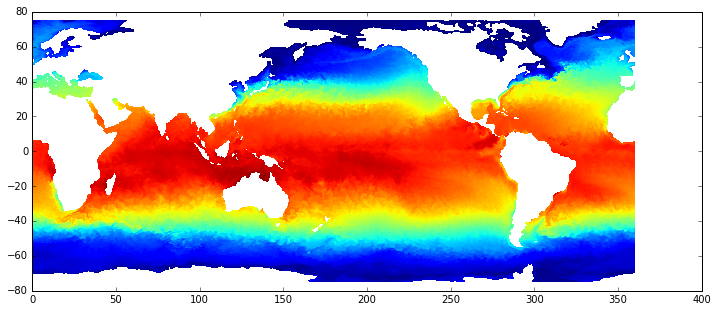

In [8]:
plt.figure(figsize=(12,5))
plt.pcolormesh(lon, lat, T)

### Do the same for a smaller subset

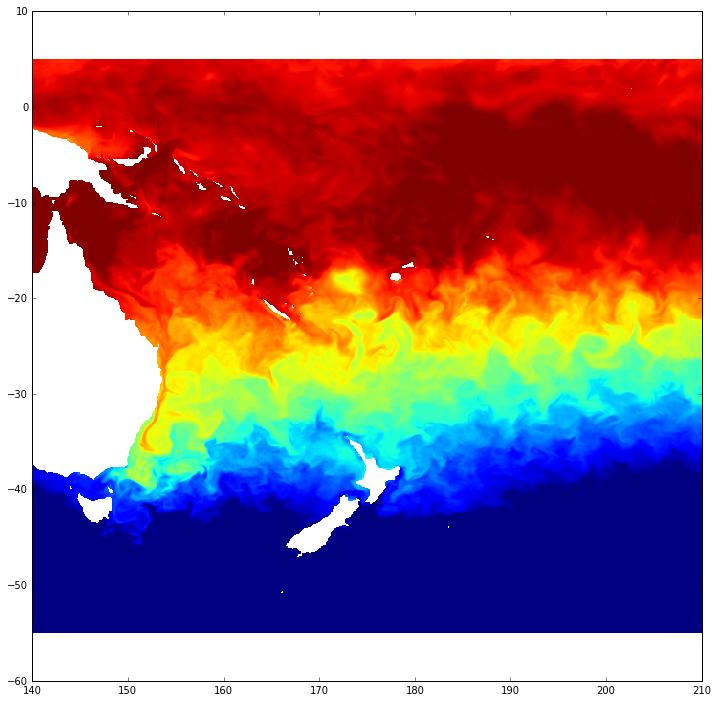

In [9]:
# time slice
i = 22

T_s = ofam.variables['temp'][i, 0, 200:800, 1400:2100]
lon_s = lon[1400:2100]
lat_s = lat[200:800]

plt.figure(figsize=(12,12))
plt.pcolormesh(lon_s, lat_s, T_s)

plt.clim(vmin=18, vmax=30)

# Himawari 8

**Geonetwork URL:** 
http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f9385_6463_3730_3415

**NCI THREDDS Data Server:**
http://dapds00.nci.org.au/thredds/catalog/rr5/satellite/obs/himawari8/FLDK/catalog.html

This example is from 23-Feb-16 at 0400. 

### Open dataset 

In [10]:
# Data paths
h8b1_path = '/g/data2/rr5/satellite/obs/himawari8/FLDK/2016/02/23/0400/20160223040000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'
h8b2_path = '/g/data2/rr5/satellite/obs/himawari8/FLDK/2016/02/23/0400/20160223040000-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'
h8b3_path = '/g/data2/rr5/satellite/obs/himawari8/FLDK/2016/02/23/0400/20160223040000-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'

# Open data
h8b1 = Dataset(h8b1_path)
h8b2 = Dataset(h8b2_path)
h8b3 = Dataset(h8b3_path)

### Take a look at the file contents¶

In [11]:
for item in h8b1.dimensions:
    print("dimensions: {}, name: {}\n".format(h8b1.dimensions[item].name,  h8b1.dimensions[item].size))

vars = h8b1.variables.keys()
for item in vars:
    print('Variable:\t{}'.format(item))
    print('Dimensions:\t{}'.format(h8b1[item].dimensions))
    print('Shape:\t{}\n'.format(h8b1[item].shape))

dimensions: time, name: 1

dimensions: y, name: 5500

dimensions: x, name: 5500

Variable:	time
Dimensions:	('time',)
Shape:	(1,)

Variable:	y
Dimensions:	('y',)
Shape:	(5500,)

Variable:	x
Dimensions:	('x',)
Shape:	(5500,)

Variable:	geostationary
Dimensions:	()
Shape:	()

Variable:	scan_line_time
Dimensions:	('y',)
Shape:	(5500,)

Variable:	channel_0001_scaled_radiance
Dimensions:	('time', 'y', 'x')
Shape:	(1, 5500, 5500)



### Extract and plot global data 

In [12]:
b1 = h8b1.variables['channel_0001_scaled_radiance'][0,:,:]
b2 = h8b2.variables['channel_0002_scaled_radiance'][0,:,:]
b3 = h8b3.variables['channel_0003_scaled_radiance'][0,:,:]

x = h8b1.variables['x'][:]
y = h8b1.variables['y'][:]

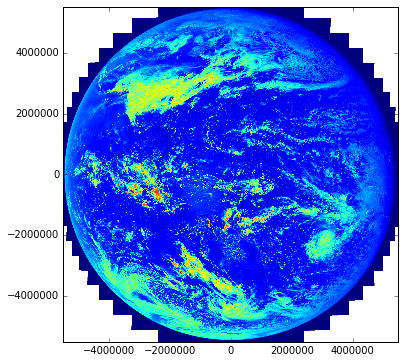

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(b1, extent=[x[0], x[-1], y[-1], y[0]])

### Instead of looking at single band, let's make an RGB image

In [14]:
vmin = 0
vmax = .5
B1 = b1.clip(vmin, vmax) / vmax * 255
B2 = b2.clip(vmin, vmax) / vmax * 255
B3 = b3.clip(vmin, vmax) / vmax * 255

rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')

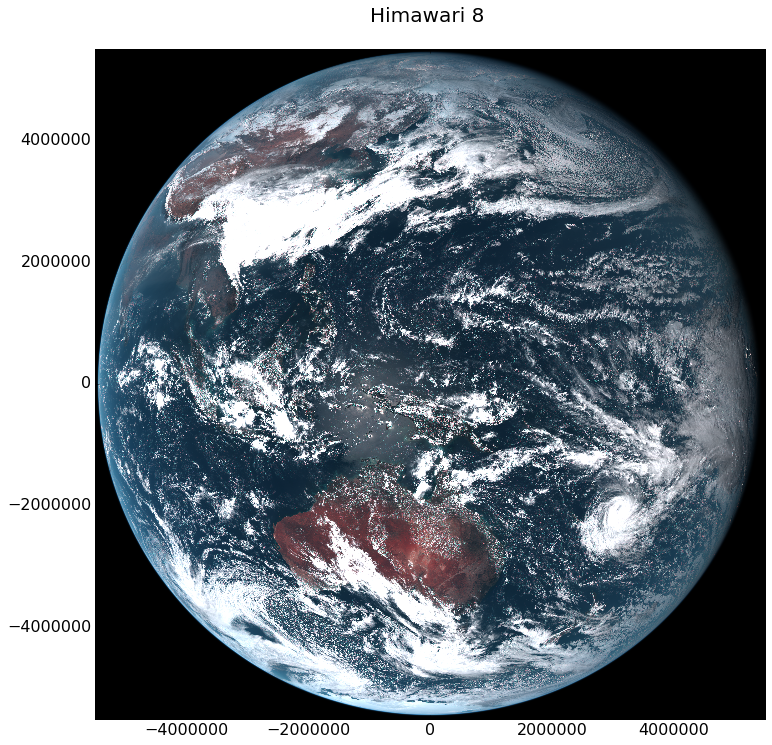

In [15]:
# Plot image
plt.figure(figsize=(12,12))
plt.imshow(rgb, extent=[x[0], x[-1], y[-1], y[0]])

# Add labels
plt.title('Himawari 8 \n', fontsize=20)

# Adjust tick mark size
plt.tick_params(labelsize=16)

### Do the same for a smaller subset (let's choose roughly the same region as the OFAM subset)
**Note:** In these examples, the subsets are specified directly by the index value but you could also query based on lat/lon values.

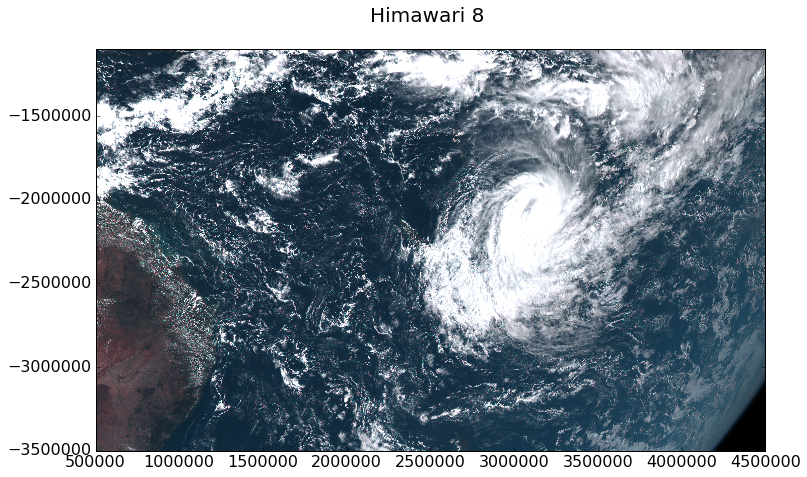

In [16]:
vmin = 0
vmax = .5
B1 = b1[3300:4500,3000:5000].clip(vmin, vmax) / vmax * 255
B2 = b2[3300:4500,3000:5000].clip(vmin, vmax) / vmax * 255
B3 = b3[3300:4500,3000:5000].clip(vmin, vmax) / vmax * 255

X = x[3000:5000]
Y = y[3300:4500]
rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')


# Plot image
plt.figure(figsize=(12,12))
plt.imshow(rgb , extent=[X[0], X[-1], Y[-1], Y[0]])

# Add labels
plt.title('Himawari 8 \n', fontsize=20)

# Adjust tick mark size
plt.tick_params(labelsize=16)

### Now let's try and plot both datasets in the same plot...

### Cartopy (based on Matplotlib but includes support for different coordinate reference systems)
**Note:** On the VDI, the Cartopy package will have to be installed locally. Instructions at the end of this notebook if you do not already have Cartopy installed. 



#### Let's first replot the previous Himawari subset

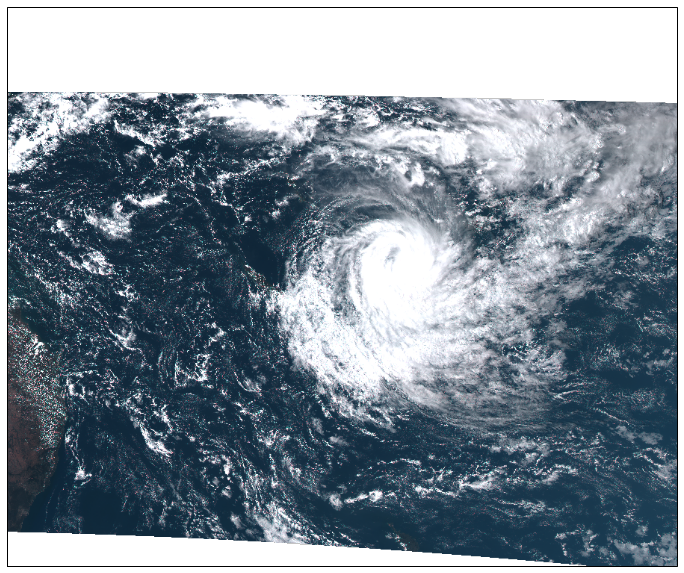

In [17]:
import cartopy.crs as ccrs

plt.figure(figsize=(12,12))

# Define the projection information of the image
img_proj = ccrs.Geostationary(central_longitude=h8b1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=h8b1['geostationary'].satellite_height)
# The extents of the image we are plotting
img_extent = (X[0], X[-1], Y[-1], Y[0])


# Setup the axes projection
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(h8b1['geostationary'].longitude_of_projection_origin)))

# Extent of the axes in the plot
ax.set_extent([150, 190, -35, -5])

# Plot image
plt.imshow(rgb, transform=img_proj, extent=img_extent, origin='upper')



#### Now let's do the same for the OFAM data

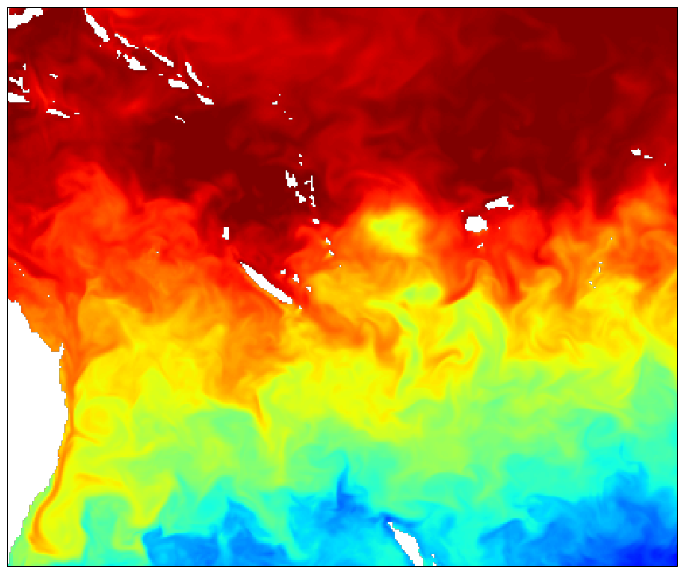

In [18]:
plt.figure(figsize=(12,12))

# Setup the axes projection
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(h8b1['geostationary'].longitude_of_projection_origin)))

# Define the projection information of the image
img_proj = ccrs.PlateCarree()

# The extents of the image we are plotting
img_extent = (lon_s[0], lon_s[-1], lat_s[-1], lat_s[0])

# Extent of the axes in the plot
ax.set_extent([150, 190, -35, -5])

plt.imshow(T_s, transform=img_proj, extent=img_extent, origin='upper')
plt.clim(vmin=18, vmax=30)

###  Now combine...

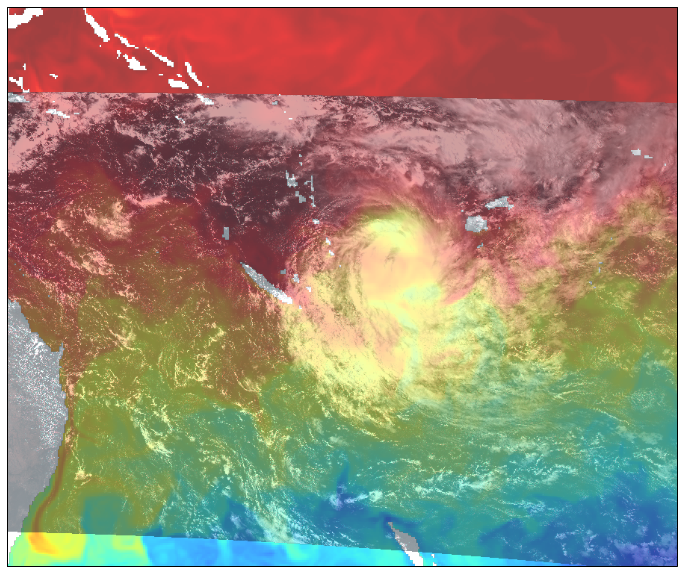

In [19]:
plt.figure(figsize=(12,12))

# Setup the axes projection
ax = plt.axes(projection=ccrs.Miller(central_longitude=float(h8b1['geostationary'].longitude_of_projection_origin)))


### OFAM ###

img_proj = ccrs.PlateCarree()
img_extent = (lon_s[0], lon_s[-1], lat_s[-1], lat_s[0])
ax.set_extent([150, 190, -35, -5])
plt.imshow(T_s, transform=img_proj, extent=img_extent, origin='upper', alpha=.75)
plt.clim(vmin=18, vmax=30)


### HIMAWARI ###
img_proj = ccrs.Geostationary(central_longitude=h8b1['geostationary'].longitude_of_projection_origin, 
                                  satellite_height=h8b1['geostationary'].satellite_height)
img_extent = (X[0], X[-1], Y[-1], Y[0])
ax.set_extent([150, 190, -35, -5])
plt.imshow(rgb, transform=img_proj, extent=img_extent, origin='upper', alpha=.5)



<div class="alert alert-info">
<b>EXTRA: </b> 
<br>
(1) Try playing around with different plotting options. For example, plotting contours instead of using "imshow".  
<br>
(2) Try merging another dataset of interest with either of the ones above. 
</div>

### Close files

In [20]:
ofam.close()
h8b1.close()
h8b2.close()
h8b3.close()